In [50]:
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [51]:
browser = webdriver.Firefox()
browser.get('https://www.google.com/search?channel=fs&client=ubuntu&q=numeri+casuali')
time.sleep(10)
# do il tempo di cliccare continua

In [52]:
#imposto i valori
minimo = 1
massimo =23
volte = 1000

min = browser.find_element_by_id('UMy8j')
min.clear()
min.send_keys(minimo)
max = browser.find_element_by_id('nU5Yvb')
max.clear()
max.send_keys(massimo)

In [53]:
# con un ciclo faccio n volte l'estrazione
genera = browser.find_element_by_id('ZdzlKb')
ris = browser.find_element_by_class_name('gws-csf-randomnumber__result')
numeri=[]
for i in range(volte): 
    genera.click()
    time.sleep(0.5)
    numeri.append(int(ris.text))

print(numeri)

[7, 14, 21, 18, 22, 22, 6, 18, 12, 10, 9, 9, 5, 4, 4, 17, 16, 12, 12, 20, 21, 10, 14, 15, 10, 13, 6, 16, 2, 20, 5, 4, 20, 17, 11, 6, 23, 14, 19, 18, 2, 2, 4, 3, 17, 21, 20, 22, 8, 7, 7, 2, 22, 12, 3, 8, 11, 18, 13, 11, 20, 4, 5, 23, 19, 5, 16, 22, 8, 13, 6, 16, 20, 9, 8, 23, 18, 6, 2, 18, 7, 9, 7, 22, 2, 8, 23, 6, 19, 22, 15, 3, 4, 9, 8, 5, 1, 8, 22, 7, 20, 8, 13, 18, 8, 5, 14, 15, 4, 6, 9, 18, 12, 8, 3, 13, 7, 5, 10, 1, 16, 21, 15, 22, 20, 15, 11, 4, 8, 3, 16, 9, 16, 21, 22, 19, 23, 20, 19, 7, 20, 3, 3, 13, 11, 7, 14, 3, 3, 5, 14, 20, 18, 1, 12, 5, 14, 17, 11, 17, 20, 8, 15, 22, 4, 4, 10, 22, 23, 4, 1, 1, 20, 10, 1, 11, 5, 12, 11, 10, 9, 4, 10, 5, 22, 3, 1, 19, 20, 5, 5, 4, 19, 9, 19, 6, 20, 2, 22, 23, 2, 8, 5, 13, 1, 4, 22, 22, 19, 3, 7, 19, 21, 22, 7, 12, 12, 11, 10, 1, 10, 11, 11, 21, 6, 12, 17, 8, 11, 20, 4, 19, 18, 6, 7, 3, 22, 3, 23, 23, 22, 4, 18, 19, 16, 8, 23, 19, 15, 22, 2, 17, 3, 16, 22, 4, 9, 6, 5, 11, 6, 17, 7, 14, 8, 2, 9, 16, 3, 3, 21, 9, 8, 6, 12, 1, 8, 10, 22, 22, 11,

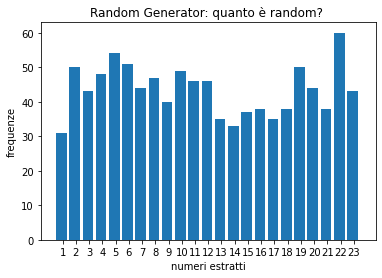

In [54]:
# a questo punto ho un array con tutti i risultati
numero_numeri = massimo-minimo

import matplotlib.pyplot as plt
plt.hist(numeri,numero_numeri+1,range =(minimo,massimo+1), width=0.8 ,align='left')

plt.xticks([k for k in range(minimo,massimo+1)])

plt.title('Random Generator: quanto è random? ')
plt.xlabel('numeri estratti')
plt.ylabel('frequenze')
plt.show()

In [62]:
tot_numeri.extend(numeri)

4000